In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Graficas
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Algoritmos
# ==============================================================================
from sklearn.tree import DecisionTreeRegressor

# Metricas de evaluación
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Entrenamiento y validación
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.simplefilter(action='ignore')

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
df = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0,0.006413


In [3]:
#Se separan las columnas para la evaluación
y = df["Incidencia"] #Variable dependiente
X = df.iloc[:,:-1] #Variables independientes
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0


In [4]:
# División de los datos en train 80% y test 20%
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "Incidencia"),
                                        df['Incidencia'],
                                        test_size = 0.2 ,
                                        random_state = 117
                                    )
#Evaluación inicial del algorítmo
clf = DecisionTreeRegressor(max_depth=7,random_state=329) #Modelo inicial
clf.fit(X_train, y_train) #Entrenamiento del modelo
predicciones = clf.predict(X = X_test) #Predicción del modelo

#Calculo de la métrica RMSE
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: ", rmse) #Se imprime la métrica RMSE
print("R2: ",r2_score(y_test,predicciones)) #Se imprime la métrica R^2

El error (rmse) de test es:  0.01078957648790785
R2:  0.6114308716255079


In [5]:
cv = KFold(n_splits=5) #Metodo de validación cruzada

#Evaluación del modelo con validación cruzada mediante la métrica R^2
scores = cross_val_score(clf, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

#Se imprime el resultado de R^2 luego de la validación cruzada
print("R2 cv:", np.mean(scores)) 

R2 cv: 0.1667414855741706


Profundidad del árbol: 7
Número de nodos terminales: 70


True

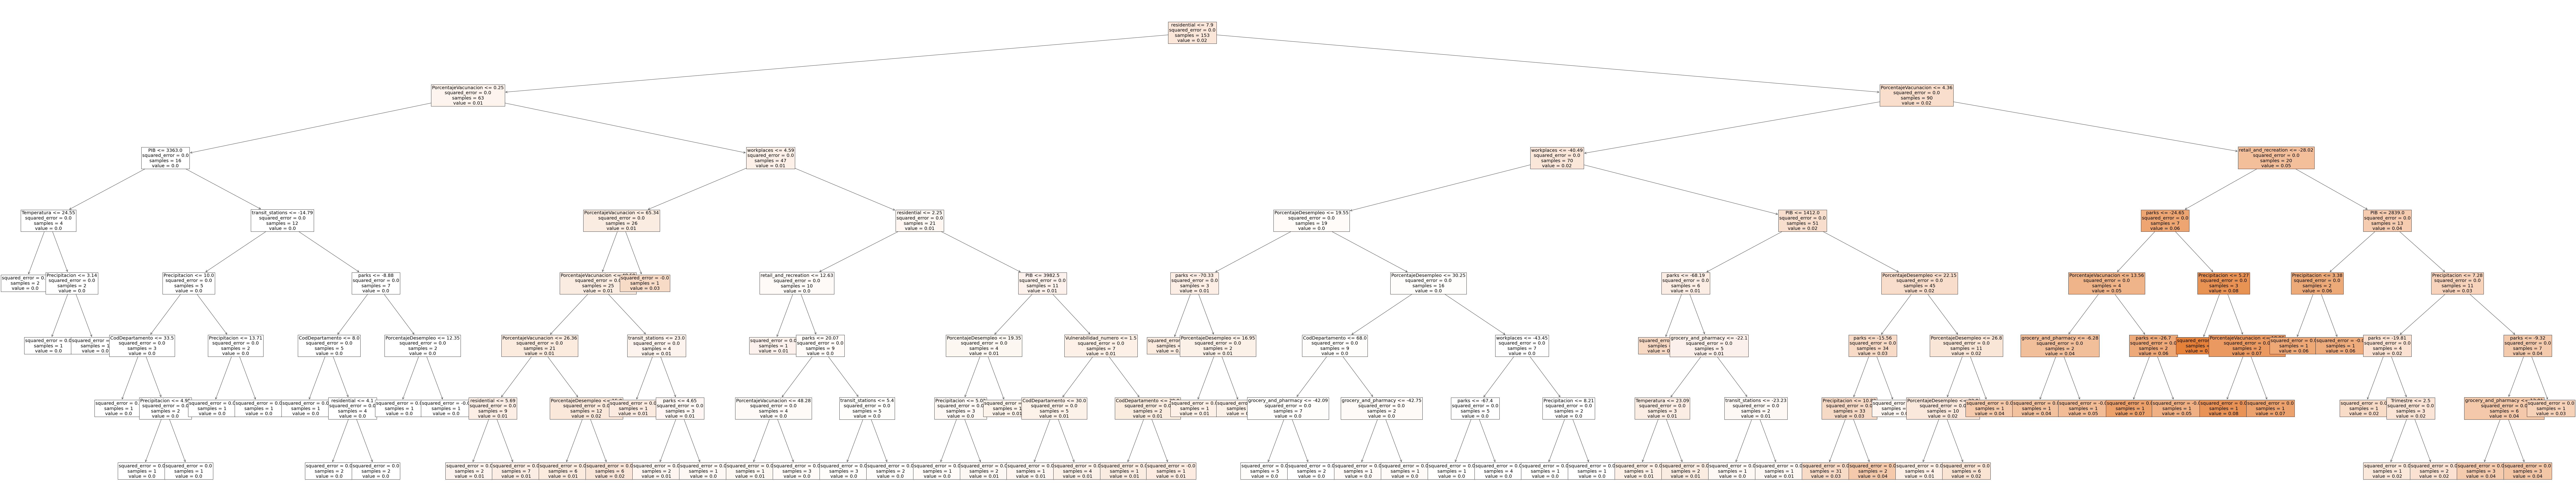

In [6]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(200, 40))

print(f"Profundidad del árbol: {clf.get_depth()}") #Imprime la profundidad del árbol
print(f"Número de nodos terminales: {clf.get_n_leaves()}") #Imprime la cantidad de nodos terminales

#Parámetros para crear el árbol
plot = plot_tree(
            decision_tree = clf, #Modelo
            feature_names = df.drop(columns = "Incidencia").columns, #Columnas a tener en cuenta
            class_names   = 'Incidencia', #Variable dependiente
            filled        = True, #Indica mediante colores la pureza del nodo 
            impurity      = True, #Muestra el valor de la impureza en cada nodo
            fontsize      = 20, #Tamaño de la fuente
            precision     = 2, #Cantidad de dígitos de precisión
            ax            = ax #Ejes para la gráfica
       )
#Se exporta la figura del árbol
dot_data = export_graphviz(clf,
                           feature_names=df.drop(columns = "Incidencia").columns)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Se guarda la imagen del árbol

## Calculo del hiperparámetro ccp_alpha

In [7]:
clf = DecisionTreeRegressor(random_state=329, max_depth=7) #Modelo usado

#Calcula la ruta para podar durante la poda de complejidad de costo mínimo
path = clf.cost_complexity_pruning_path(X_train, y_train)
#Se obtiene alphas efectivos del subárbol podado y la suma de impurezas 
# de las hojas para cada valor de alpha 
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas) #Se imprime los valores de alpha efectivos

[0.00000000e+00 1.77094787e-15 1.25996797e-14 1.26710728e-14
 5.64381519e-14 1.27851410e-13 4.19591786e-13 6.75158157e-13
 1.33358268e-12 2.38971154e-12 3.48708449e-12 7.23160909e-12
 8.48026537e-12 9.22305424e-12 7.53579409e-11 1.18635321e-10
 3.65312963e-10 1.22002655e-09 1.30870150e-09 2.13041420e-09
 8.89302721e-09 9.77826811e-09 1.26202595e-08 2.55812816e-08
 2.66335213e-08 3.70197928e-08 4.01858307e-08 4.37125300e-08
 4.83299165e-08 6.07641101e-08 6.26534740e-08 6.80440183e-08
 8.30493661e-08 8.42935839e-08 9.42905326e-08 1.03781707e-07
 1.68508664e-07 1.71537713e-07 1.76526746e-07 2.27844342e-07
 2.29034002e-07 2.53276016e-07 3.34910482e-07 3.53285346e-07
 4.09957228e-07 4.32286536e-07 4.32855072e-07 5.82782870e-07
 7.93581362e-07 9.02792369e-07 9.81892597e-07 1.06801454e-06
 1.39540131e-06 1.60999572e-06 1.62231336e-06 1.82466444e-06
 1.83769528e-06 2.34399067e-06 2.77443872e-06 3.14531187e-06
 4.25456721e-06 4.34979979e-06 4.70274007e-06 6.40856887e-06
 8.21925625e-06 9.226754

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

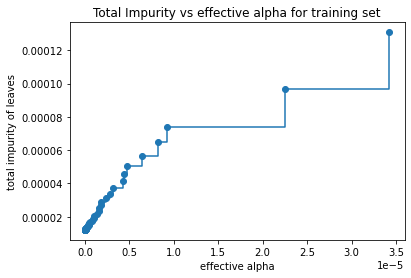

In [9]:
#Se crea el espacio para la gráfica
fig, ax = plt.subplots()
#Se gráfica los puntos para los valores de alpha y la suma de impurezas
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
#Se establecen las etiquetas de la gráfica
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [1]:
#Se crea un vector vacio para almacenar los valores de alpha, menos el último
clfs = []
#Se crea un ciclo for para evaluar cada valor de alpha efectivo en el modelo
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=329, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train) #Se entrena el modelo
    clfs.append(clf) #Se guarda cada valor en el vector
    
#Se imprime el número de nodos en el último árbol
print(
    "El numero de nodos en el ultimo arbol es: {} con ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

NameError: name 'ccp_alphas' is not defined

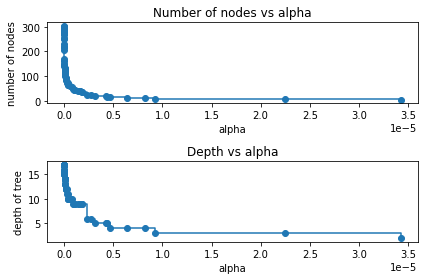

In [11]:
#Se elimina el último dato debido a que representa la poda de todas las hojas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Se cuenta el numero de nodos para cada valor de alpha
node_counts = [clf.tree_.node_count for clf in clfs]
#Se cuenta la profundidad del arbol para cada valor de alpha
depth = [clf.tree_.max_depth for clf in clfs]
#Se establecen los parámetros para las gráficas
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

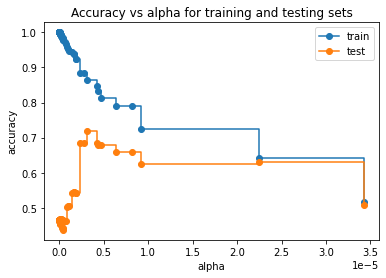

In [12]:
#Se obtiene la exactitud para cada valor de alpha entre el conjunto de datos de entrenamiento
train_scores = [clf.score(X_train, y_train) for clf in clfs]
#Se obtiene la exactitud para cada valor de alpha entre el conjunto de datos de prueba
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#Se establecen los parámetros para las gráficas
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

{'ccp_alpha': array([0.00000000e+00, 2.56410256e-07, 5.12820513e-07, 7.69230769e-07,
       1.02564103e-06, 1.28205128e-06, 1.53846154e-06, 1.79487179e-06,
       2.05128205e-06, 2.30769231e-06, 2.56410256e-06, 2.82051282e-06,
       3.07692308e-06, 3.33333333e-06, 3.58974359e-06, 3.84615385e-06,
       4.10256410e-06, 4.35897436e-06, 4.61538462e-06, 4.87179487e-06,
       5.12820513e-06, 5.38461538e-06, 5.64102564e-06, 5.89743590e-06,
       6.15384615e-06, 6.41025641e-06, 6.66666667e-06, 6.92307692e-06,
       7.17948718e-06, 7.43589744e-06, 7.69230769e-06, 7.94871795e-06,
       8.20512821e-06, 8.46153846e-06, 8.71794872e-06, 8.97435897e-06,
       9.23076923e-06, 9.48717949e-06, 9.74358974e-06, 1.00000000e-05])}


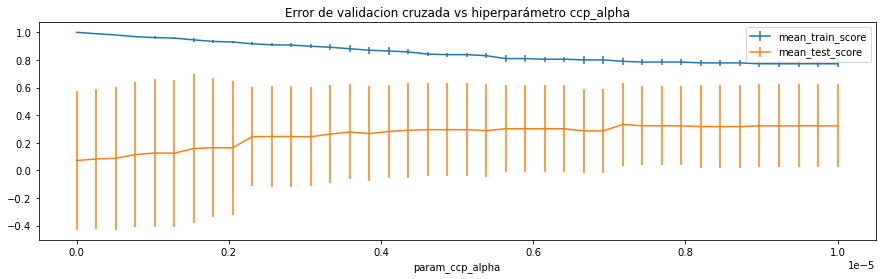

In [13]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 0.00001, 40)}
print(param_grid)
# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None, #Profundidad maxima
                            min_samples_split = 2, #Número mínimo de muestras requeridass para dividir un nodo interno
                            min_samples_leaf  = 1, #Número mínimo de muestras requeridas para estar en un nodo hoja
                            random_state      = 329
                       ),
        param_grid = param_grid, #Parámetro variable
        cv         = 5, #Método de validación cruzada
        refit      = True, #Reajusta el estimador con los mejores parámetros encontrados
        return_train_score = True #Calcula la exactitud del conjunto de datos de entrenamiento
      )

grid.fit(X_train, y_train) #Se entrena el modelo

#Se establecen los parámetros para la gráfica
fig, ax = plt.subplots(figsize=(15, 4))
scores = pd.DataFrame(grid.cv_results_) #Se obtiene los resultados
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [14]:
grid.best_params_ #Obtiene el mejor valor para el parámetro ccp_alpha

{'ccp_alpha': 7.17948717948718e-06}

Profundidad del árbol: 4
Número de nodos terminales: 7


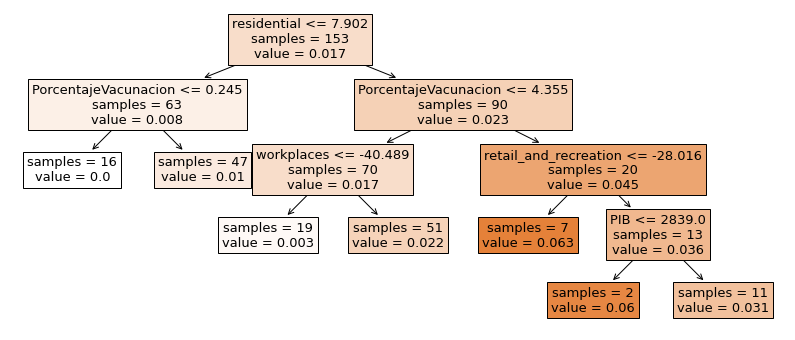

In [15]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}") #Se imprime la profundidad del árbol
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}") #Se imprime la cantidad de nodos terminales (hojas)

fig, ax = plt.subplots(figsize=(14, 6))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True, #Indica mediante colores la pureza del nodo
            impurity      = False, #Muestra el valor de la impureza en cada nodo
            fontsize      = 13, #Tamaño de la fuente
            ax            = ax
       )

## GridSearchCV

In [16]:
#Mediante GridSearchCV se buscan los mejores parámetros variando los siguientes hiperparámetros
parameters = {'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth'    : range(1, 20, 1),
              'random_state' : [329]
             }

In [17]:
grid = GridSearchCV(DecisionTreeRegressor(),parameters) #Se crea el estimador
model = grid.fit(X_train,y_train) #Se entrena el estimador
print(model.best_params_,'\n') #Se imprime los mejores parámetros
print(model.best_estimator_,'\n') #Se imprime el mejor estimador

{'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'auto', 'random_state': 329} 

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=329) 



In [18]:
#Se imprime el modelo con los mejores parámetros
model_n = model.best_estimator_ 
model_n

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=329)

In [19]:
model = model_n.fit(X_train,y_train) #Se entrena el modelo
predicciones = model_n.predict(X = X_test) #Se evalua el modelo

#Métrica de evaluación RMSE
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
#Resultados para las métricas RMSE y R^2
print(f"El error (rmse) de test es: ", {rmse})
print("R2: ",r2_score(y_test,predicciones))

El error (rmse) de test es:  {0.00934089542235024}
R2:  0.7087697274078004


In [20]:
# Preparación del método de validación cruzada
cv = KFold(n_splits=5)

#Evaluación del modelo por medio de validación cruzada
scores = cross_val_score(model_n, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_r = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# Se imprimen los resultados para las métricas R^2 y RMSE
print("R2 cv:", np.mean(scores))
print("RMSE cv:", np.mean(-1*scores_r))

R2 cv: 0.5885383012228657
RMSE cv: 0.010400392676725172


In [21]:
#Se imprime la tabla con los mejores parámetros y su resultado en la evaluación
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.007770,0.001107,0.003001,0.000623,absolute_error,4,auto,329,"{'criterion': 'absolute_error', 'max_depth': 4...",0.651022,0.621360,0.569940,0.485098,0.615272,0.588538,0.057866
2,0.005596,0.000491,0.003400,0.000487,poisson,4,auto,329,"{'criterion': 'poisson', 'max_depth': 4, 'max_...",0.680089,0.660372,0.550904,0.495334,0.392092,0.555758,0.106643
3,0.005996,0.000637,0.003601,0.000492,squared_error,13,sqrt,329,"{'criterion': 'squared_error', 'max_depth': 13...",0.523392,0.606194,0.567049,0.517308,0.479591,0.538707,0.043692


In [22]:
#Se crea un modelo con los mejores parámetros con GridSearchCV y se agrego el mejor valor para ccp_alpha
model_n = DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=329, ccp_alpha=7.17948717948718e-06)
model_n #Se imprime el modelo

DecisionTreeRegressor(ccp_alpha=7.17948717948718e-06,
                      criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=329)

In [23]:
model = model_n.fit(X_train,y_train) #Se entrena el modelo
predicciones = model_n.predict(X = X_test) #Se evalua el modelo

#Se calcula la métrica RMSE
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

#Se imprime los resultados para las métrica RMSE y R^2
print(f"El error (rmse) de test es: ", rmse)
print("R2: ",r2_score(y_test,predicciones))

El error (rmse) de test es:  0.009340734531768542
R2:  0.7087797598088312


In [24]:
#Se imprime la importancia que tuvo en cuenta el modelo para cada columna
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "Incidencia").columns,
                             'importancia': model_n.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
12,residential,0.445722
11,workplaces,0.288363
13,PorcentajeVacunacion,0.147125
8,grocery_and_pharmacy,0.061674
3,PorcentajeDesempleo,0.030142
6,PIB,0.016249
7,retail_and_recreation,0.006693
2,Trimestre,0.004032
0,CodDepartamento,0.000000
1,Ano,0.000000
